# Аналитика клиентов и логов gamedev-стартапа

Gamedev-стартап вывел на рынок игру: в приложении пользователь пытается угадать ответы на предлагаемые вопросы. Набор данных состоит из двух датасетов: user_data и logs.

## Описание данных:

user_data:

* client – идентификатор пользователя  
* premium – есть ли у клиента премиум статус  
* age – возраст  

logs:

* client – идентификатор пользователя  
* success – результат ответа (операции): успех - 1, нет - 0  
* platform – платформа  
* time – время в формате Unix

## Цель:
1. Анализ данных о поездках на такси в Нью-Йорке;
2. Получение инсайтов для бизнес-решений.

## Задачи:
1. Найти клиентов с наибольшим количеством успешных ответов;
2. Определить платформу, с какой было дано наибольшее количество успешных ответов;
3. Определить самую популярную платформу среди премиум-клиентов;
4. Сравнить самую популярную платформу с остальными платформами;
5. Опрделить категорию клиентов с высшей долей неуспешных ответов;
6. Сравнить возраст премиум и обычных клиентов;
7. Определить возраст клиентов, давших наибольшее количество успешных ответов на компьютере.


In [35]:
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
user_data = pd.read_csv('3_user_data.csv')
logs      = pd.read_csv('3_logs.csv')



### Предварительный просмотр данных.

Просмотр датафреймов, размер каждой таблицы, типы данных и описательная статистика колонок.

In [2]:
user_data.describe()



,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


### Просмотр пустых значений в датафрейме `user_data`

Значение в столбце Non-Null Count описывает, сколько НЕпустых значений хранится в колонке. 
Это число (2954) совпадает с количеством строк всего датафрейма, следобвательно, *пустых значений нет*.

In [3]:
user_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


## Задача 1
### Клиенты с наибольшим количеством успешных ответов.

Cтартап выбирает амбассадоров продукта, чтобы через них продвигать игру. Для этого менеджер хочет встретиться с наиболее активными клиентами, которые дают больше других верных ответов. Задача — выявить таких клиентов.

#### Для выполнения задачи отбираем из данных только успешные ответы (строки, где значение в столбце `success` датафрейма `logs` равно `True`) и считаем количество строк и находим максимальное.

In [5]:
logs.query('success==True')


,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
5,41928,True,phone,1585446772
...,...,...,...,...
4493,92584,True,computer,1585408896
4494,95152,True,computer,1585420263
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121


In [6]:
count_success_answ=logs.loc[logs.success==True].client.value_counts()
count_success_answ

36165    41
61468    41
12179    41
61473    41
78349    41
         ..
36194     1
57752     1
84618     1
53228     1
36864     1
Name: client, Length: 2845, dtype: int64

In [7]:
mx=count_success_answ.max()



 #### Оставляем только записи о клиентах, которые дали максимальное число успешных ответов.

In [8]:
users_max=count_success_answ.loc[count_success_answ==mx]
users_max

36165    41
61468    41
12179    41
61473    41
78349    41
28719    41
92584    41
52870    41
82563    41
Name: client, dtype: int64

#### И получаем идентификаторы этих клиентов.

In [10]:
users_max.index.sort_values()



Int64Index([12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584], dtype='int64')

## Задача 2
### Платформа, с какой было дано наибольшее количество успешных ответов
Команда стартапа хочет развивать свою игру, но имеет ограниченные ресурсы, поэтому решила определиться, с какой платформы стоит начать.



(phone)

#### Отбираем только успешные ответы.

In [11]:
logs.loc[logs['success'] == True]




,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
5,41928,True,phone,1585446772
...,...,...,...,...
4493,92584,True,computer,1585408896
4494,95152,True,computer,1585420263
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121


#### Считаем количество успешных ответов с каждой платформы и находим платформу с максимальным значением.

In [12]:
cnt_sucs_platform=logs.loc[logs.success==True].platform.value_counts()
cnt_sucs_platform

phone       2019
computer    1090
tablet       180
Name: platform, dtype: int64

In [13]:
cnt_sucs_platform.idxmax()


'phone'

## Задача 3
### Самая популярная платформа среди премиум-клиентов.

Менеджер продукта выдвинул идею, что стоит сфокусироваться не просто на одной платформе, но ещё и только на сегменте премиум.



(phone)

#### Объединяем датафреймы `user_data` и `logs` по колонке `client`, чтобы собрать вместе информацию о статусе клиента и его активности в приложении

In [14]:
client_info=user_data.merge(logs, on='client', how='inner')
client_info

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [15]:
client_info.head()


,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


#### Отбераем записи о премиум-клиентах

In [19]:
client_prem=client_info.loc[client_info.premium==True]
client_prem

,client,premium,age,success,platform,time
23,74867,True,27,False,computer,1585452086
24,49379,True,25,False,computer,1585433626
25,88203,True,35,True,phone,1585450059
30,32603,True,20,True,computer,1585473383
52,53182,True,24,True,phone,1585406474
...,...,...,...,...,...,...
3413,52373,True,36,True,phone,1585405142
3415,13688,True,66,True,computer,1585453923
3419,40643,True,22,True,phone,1585413473
3432,53774,True,50,True,phone,1585422804


#### Считаем количество ответов премиум-клиентов с каждой платформы

In [17]:
client_prem_cnt_answ=client_prem.platform.value_counts()
client_prem_cnt_answ

phone       246
computer    150
tablet       24
Name: platform, dtype: int64

#### Определяем платформу с наибольшим количеством ответов премиум-клиентов

In [18]:
client_prem_cnt_answ.idxmax()

'phone'

## Задача 4
### Сравнение самой популярной платформы с остальными платформами.
Менеджер хочет посмотреть, насколько она более востребованная, чем остальные платформы. Сравнивать числа удобнее не в таблице, а на графике.


Построим график, демонстрирующий количество ответов премиум-клиентов на каждой платформе.

#### Отберём записи о премиум-клиентах и посчитаем количество их ответов для каждой платформы.

In [22]:
cl_premium_platform_data = client_info.query('premium == True').platform.value_counts()
cl_premium_platform_data

phone       246
computer    150
tablet       24
Name: platform, dtype: int64

#### Построим столбчатую диаграмму, где по оси y будут названия платформ, а по оси x - количество ответов.

<BarContainer object of 3 artists>

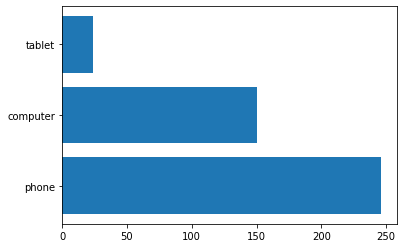

In [23]:
plt.barh(cl_premium_platform_data.index, cl_premium_platform_data)


## Задача 5

### Категория клиентов с высшей долей неуспешных ответов.

Возможно, команде стоит сфокусироваться на работе именно с премиум-клиентами. Посмотрим на долю неуспешных ответов от всего количества ответов — отдельно у премиум и обычных клиентов. 

#### Группируем объединенный датафрейм, полученный на прошлом шаге, по категории клиентов (колонка `premium`) и успешности ответа (колонка `success`), затем посчитаем количество записей для каждой группы.

In [24]:
cl_premium_platform_data=client_info.groupby(['premium', 'success'], as_index = False).agg({'client':'count'})
cl_premium_platform_data

,premium,success,client
0,False,False,775
1,False,True,2244
2,True,False,117
3,True,True,303


####  Преобразуем форму агрегированного датафрейма так, чтобы в строках была категория клиента (премиум или нет), в колонках успешность результата (да или нет), а в значениях — количество записей для каждой группы.

In [25]:
cl_prem_platform_pivot=cl_premium_platform_data.pivot(index = 'premium', columns = 'success', values = 'client')
cl_prem_platform_pivot

success,False,True
premium,,
False,775,2244
True,117,303


#### Создаём новую колонку с долей неуспешных ответов от всего количества ответов. Для этого разделим колонку с числом неуспешных ответов на сумму значений из колонок с числом успешных и неуспешных ответов.

In [26]:
cl_prem_platform_pivot['unsuccess_rate'] = (cl_prem_platform_pivot[False] / (cl_prem_platform_pivot[True].sum() + cl_prem_platform_pivot[False].sum()))
cl_prem_platform_pivot

success,False,True,unsuccess_rate
premium,,,
False,775,2244,0.225356
True,117,303,0.034022


####  У какой категории клиентов (премиум или обычных) доля неуспешных ответов выше, т.е. в какой строке значение больше?


В строке с индексом False значение доли для обычных клиентов, а в строке с индексом True - для премиум.

Доля неуспешных ответов выше у обычных клиентов.

## Задача 6
### Сравнение возраста премиум и обычных клиентов.

У команды всё ещё есть сомнения по поводу работы только с премиум-клиентами. Посмотрим, как возраст премиум-клиентов отличается от возраста обычных. 

(премиум-клиентов возраста примерно 35-39 лет меньше, чем обычных клиентов этого же возраста)

#### Строим график распределения возраста премиум-клиентов.

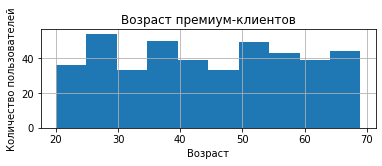

In [31]:
prem_age_compare=client_info.query('premium == True') 
plt.subplot(2, 1, 1)
plt.hist(prem_age_compare['age'])
plt.title('Возраст премиум-клиентов')
plt.ylabel('Количество пользователей')
plt.xlabel('Возраст')
plt.grid()

### График распределения количества успешных ответов на пользователя
По оси `x` - число успешных ответов, а по оси `y` - сколько пользователей дали такое число успешных ответов.

Посмотрев на аналитику по премиум-клиентам, команда стартапа решила всё-таки работать со всеми категориями клиентов и в первую очередь обратить внимание на число успешных и неуспешных ответов. 

#### Отберём успешные ответы.
(строки, где значение в столбце `success` датафрейма `logs` равно `True`)

In [32]:
answ_success = logs.query('success==True')
answ_success

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
5,41928,True,phone,1585446772
...,...,...,...,...
4493,92584,True,computer,1585408896
4494,95152,True,computer,1585420263
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121


#### Подсчитаем количество успешных ответов для каждого клиента

In [33]:
count_answ_success=answ_success['client'].value_counts()
count_answ_success

36165    41
61468    41
12179    41
61473    41
78349    41
         ..
36194     1
57752     1
84618     1
53228     1
36864     1
Name: client, Length: 2845, dtype: int64

#### Чтобы не запутаться в значениях, переименуем получившуюся серию - сейчас колонка в ней называется `client`, хотя в ней число успешных ответов.

In [34]:
count_answ_success = count_answ_success.rename('number_of_success')
count_answ_success

36165    41
61468    41
12179    41
61473    41
78349    41
         ..
36194     1
57752     1
84618     1
53228     1
36864     1
Name: number_of_success, Length: 2845, dtype: int64

#### На основе получившейся серии строим график, распределения количества успешных ответов на пользователя.


Бóльшая часть наблюдений сосредоточена в левой части графика

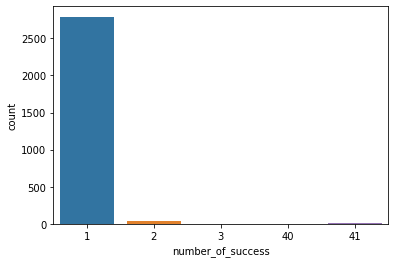

In [36]:
sns.countplot(x = count_answ_success)

## Задача 7
### Клиенты какого возраста дали наибольшее количество успешных ответов на компьютере

Визуализируем число успешных ответов, сделанных на платформе `computer`, в зависимости от возраста. По оси `x` будет идти возраст, по оси `y` – число успешных ответов.

#### Строим график числа успешных ответов в зависимости от возраста. По оси `x` – возраст, по оси `y` – число успешных ответов.


(Клиенты с возрастом 28 лет дали натбольшее количество успешных ответов)

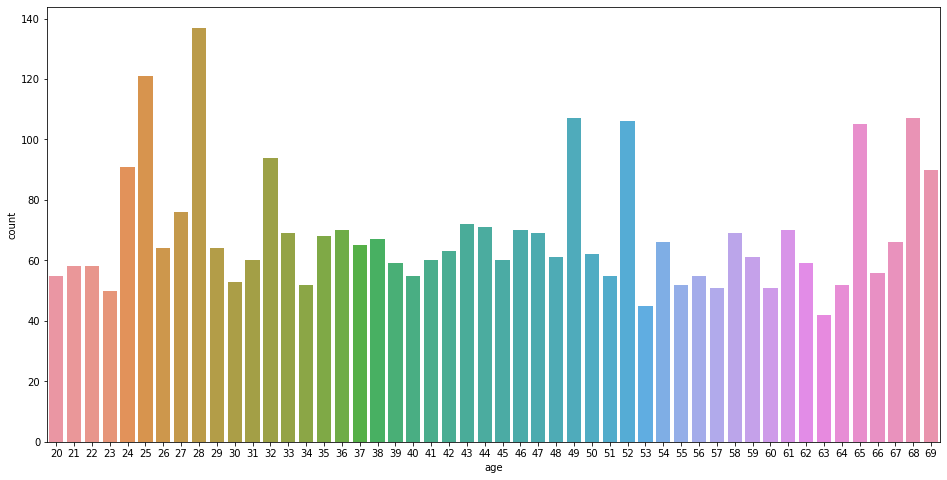

In [38]:
plt.figure(figsize=(16, 8))
sns.countplot(data=success_answ, x = client_info.age)

## Итоги

В проекте собрана аналитика для команды геймдев-стартапа для принятия решения о векторе развития продукта. 
В работе понадобились навыки объединения данных и изменения их формы, а также построения графиков и принятия решений на основе визуализации.

Были решены поставленные задачи:

1. Идентификаторы клиентов с наибольшим количеством успешных ответов: 36165, 61468, 12179, 61473, 78349;
2. Платформа, с какой было дано наибольшее количество успешных ответов - телефон;
3. Самая популярная платформа среди премиум-клиентов также телефон (phone);
4. Сравнили самую популярную платформу phone с остальными платформами. Для этого построили график количества ответов премиум-клиентов на каждой платформе. Количество ответов таких клиентов на телефоне (phone) в 1,64 раза больше, чем на компьютере (computer) и в 10,24 раза больше, чем на планшете (tablet);
5. Доля неуспешных ответов выше у обычных клиентов;
6. Сравнили возраста премиум и обычных клиентов.
У нас чуть больше 40 премиум-клиентов возраста ориентировочно 65-69 лет.
Среди премиум-клиентов больше тех, кому примерно 25-30 лет, чем тех, кому примерно 20-25 лет.
премиум-клиентов возраста примерно 35-39 лет меньше, чем обычных клиентов этого же возраста
7. Определить возраст клиентов, давших наибольшее количество успешных ответов на компьютере.
